In [1]:
import os, json, sys
sys.path.append('../..')

In [2]:
import numpy as np
from density_lime.kernel_density_exp import KernelDensityExp
from test_kde_2d import TestKDELocal2D

from density_lime.density_vae import DensityVAE

In [3]:
from torch import nn, optim

In [4]:
from torchvision import datasets, transforms
import torch
import torch.utils.data


epochs = 10
cuda = True
batch_size = 128
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

In [5]:
density = DensityVAE(input_dim=784)

In [6]:
# density.fit(train_loader, epochs=20)

In [7]:
# density.save_manifold('./mode_vae_manifold.pth')

In [8]:
density.load_manifold('./mode_vae_manifold.pth')

In [9]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [10]:
x_1 = example_data #.to(density.model.device_cpu).numpy()
x_1.shape

torch.Size([128, 1, 28, 28])

In [11]:
import matplotlib.pyplot as plt
def plot_figure(x_1, y_=0):
#     x_img = x_1.reshape(28, 28)
    x_img = x_1
    x_img_plot = x_img  # .cpu().numpy()
    
    fig, ax1 = plt.subplots(1,1)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.title(y_)
    cp = ax1.imshow(x_img_plot, interpolation = 'none')
    plt.colorbar(cp)
    plt.show()

In [12]:
for i in range(x_1.shape[0][:20]):
    x_explain = x_1[i][0].numpy()
    print('index: ', i)
    cp = plot_figure(x_explain)
    

TypeError: 'int' object is not subscriptable

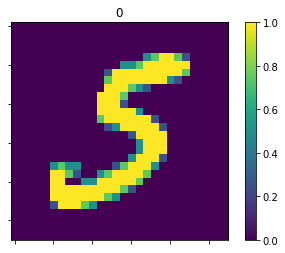

In [13]:
x_explain = x_1[0][0].numpy()
cp = plot_figure(x_explain)
    
try:
    del output
except:
    pass
torch.cuda.empty_cache() 

In [40]:
x_sample = density.sample_radius(x_exp=x_explain.reshape(-1, 784), r=0.1, n_samples=15000, random_state=None)

In [41]:
x_sample.shape

(15000, 784)

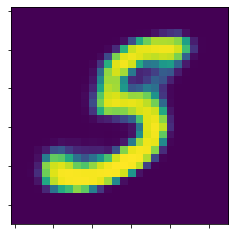

In [42]:
x_imge = x_sample[8].reshape(28, 28)
import matplotlib.pyplot as plt
# img = sample.view(64, 1, 28, 28)
fig, ax1 = plt.subplots(1,1)
# ax1.imshow(img[50][0], interpolation = 'none')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
ax1.imshow(x_imge, interpolation = 'none')
# ax1.set_title('Digit: {}'.format(y))

In [43]:
# fig, axis = plt.subplots(10, 10, figsize=(15, 10))
# axis= axis.reshape(-1)
# for ax, img_i in zip(axis, x_sample[30:]):
#     x_ = img_i.reshape(28, 28)
#     plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)
#     ax.imshow(x_, interpolation = 'none')
# plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
# plt.show()

In [44]:
# axis= axis.reshape(-1)
# for i, img_i in enumerate(x_sample[:100]):
#     fig, axis = plt.subplots(1, figsize=(10, 10))
#     x_ = img_i.reshape(28, 28)
#     plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)
#     axis.imshow(x_, interpolation = 'none')
# #     plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
#     plt.savefig('./fig/fig{:}.png'.format(i))

In [45]:
from playground.models import mnist_CNN
from torch.optim.lr_scheduler import StepLR

In [46]:
import os
os.getcwd()

'/home/tiago/projects/density-lime/src/playground/kde'

In [47]:
from playground.models import mnist_CNN

In [48]:
path='mode_mnist_cnn.pth'
# model_predict = mnist_CNN.train_and_save_model(path=path)
model_predict = mnist_CNN.model_load(density.model.device, path=path)

In [49]:
example_data = torch.from_numpy(x_sample.reshape(-1, 1, 28, 28)).to(density.model.device)
x_explain_tf = torch.from_numpy(x_explain.reshape(-1, 1, 28, 28)).to(density.model.device)
y_explain = model_predict(x_explain_tf)
y_explain_index = y_explain.data.max(1, keepdim=True)[1][0].item()
y_explain_index

5

In [50]:
try:
    del output
except:
    pass
torch.cuda.empty_cache() 
output = model_predict(example_data)
output_np = output.data.exp().to(density.model.device_cpu).numpy()

In [51]:
# fig, axis = plt.subplots(10, 10, figsize=(15, 10))
# axis= axis.reshape(-1)
# for i, (ax, img_i) in enumerate(zip(axis, example_data)):
#     x_ = img_i.to(density.model.device_cpu).reshape(28, 28)  # .reshape(28, 28)
#     plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)
#     ax.imshow(x_, interpolation = 'none')
#     ax.set_title("Prediction: {}".format( output.data.max(1, keepdim=True)[1][i].item()))
    
# plt.show()

In [57]:
# for i, img_i in enumerate(example_data[:200]):
#     fig, ax = plt.subplots(1, figsize=(10, 10))
#     x_ = img_i.to(density.model.device_cpu).reshape(28, 28)  # .reshape(28, 28)
#     plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)
#     ax.imshow(x_, interpolation = 'none', cmap='gray')
#     index_sorted = np.argsort(output_np[i])[::-1][:2]
#     porcentagem = output_np[i][index_sorted]*100
#     ax.set_title("Prediction: {} - {:5.2f} ; {} - {:5.2f} ".format(
#         output.data.max(1, keepdim=True)[1][i].item()
#         , porcentagem[0]
#         , index_sorted[1]
#         , porcentagem[1]
        
#     )
                 
#     )
# #     plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
#     plt.savefig('./fig/fig{:}.png'.format(i))
#     plt.close()

In [58]:
x_sample.shape

(15000, 784)

In [59]:
output_np.shape

(15000, 10)

In [60]:
from sklearn.linear_model import HuberRegressor

def plot_explanation(y_explain_index, model_linear=None):
    importance = plot_importance(y_explain_index, model_linear)

def plot_importance(y_explain_index, model_linear=None):
    # select = [i for i in range(output_np.shape[1]) if i != y_explain_index]
    # out_others = np.sum(output_np[:, select], axis=1)
    y_p = np.empty((output_np.shape[0]))
    
    print('class to explain:', y_explain_index)
    y_p[:] = output_np[:, y_explain_index]
    # y_p[:, 1] = out_others

    if model_linear is None:
        model_linear = HuberRegressor()
    model_linear.fit(x_sample, y_p)

    importance = model_linear.coef_.reshape(28, 28)
#     importance[np.abs(importance)<0.001] = 0
    # Plot Result
    fig, ax = plt.subplots(1,3, figsize=(20, 10))
    ax.reshape(-1)
    ax[0].set_title('Importance')
    plt.setp(ax[0].get_xticklabels(), visible=False)
    plt.setp(ax[0].get_yticklabels(), visible=False)
    cp = ax[0].imshow(importance, interpolation = 'none', cmap='jet')
   
    positive = importance.copy()
    positive[positive < 0] = 0
    positive = positive #*(x_explain.reshape(28, 28)+1.0*np.ones((28,28)))

    ax[1].set_title('Postivo')
    plt.setp(ax[1].get_xticklabels(), visible=False)
    plt.setp(ax[1].get_yticklabels(), visible=False)
    cp1 = ax[1].imshow(positive, interpolation = 'none', cmap='jet')
    
    negative = importance.copy()
    negative[negative > 0] = 0
    negative = np.abs(negative)
    negative = negative #*(x_explain.reshape(28, 28)+1.0*np.ones((28,28)))

    ax[2].set_title('Negative')
    plt.setp(ax[2].get_xticklabels(), visible=False)
    plt.setp(ax[2].get_yticklabels(), visible=False)
    cp1 = ax[2].imshow(negative, interpolation = 'none', cmap='jet')
    
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.95, 0.25, 0.04, 0.5])
    fig.colorbar(cp, cax=cbar_ax)
    plt.show()

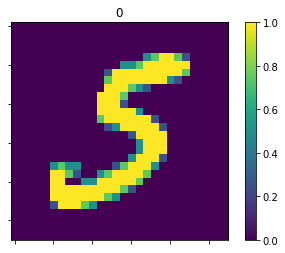

class to explain: 5


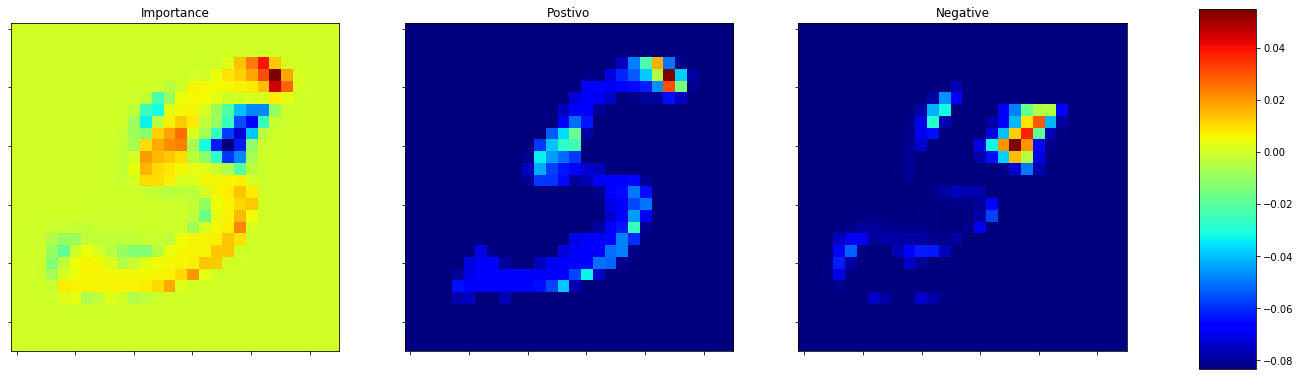

In [61]:
cp = plot_figure(x_explain)
importance = plot_explanation(y_explain_index)


### TODO: find the boundary of the image

In [62]:
# from skimage.filters import gaussian
# from skimage.segmentation import active_contour

# s = np.linspace(0, 2*np.pi, 400)
# r = 100 + 100*np.sin(s)
# c = 220 + 100*np.cos(s)
# init = np.array([r, c]).T
# img = x_explain.reshape(28, 28)
# snake = active_contour(img,
#                        init, alpha=0.015, beta=10, gamma=0.001,
#                        )

# fig, ax = plt.subplots(figsize=(7, 7))
# # ax.imshow(img, cmap=plt.cm.gray)
# ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
# ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
# ax.set_xticks([]), ax.set_yticks([])
# ax.axis([0, img.shape[1], img.shape[0], 0])

# # plt.show()


In [63]:
# y_p = model_predict(torch.from_numpy(positive.reshape(-1, 1, 28, 28), ).float().to(density.model.device))

In [64]:
# y_p.data.max(1, keepdim=True)[1][0].item()

## Why is not a 4

In [65]:
# select = [i for i in range(output_np.shape[1]) if i != y_explain_index]
class_index = np.argsort(output_np[:, :], axis=1)
# y_p = np.empty((output_np.shape[0], 1))
# y_p[:, 0] = output_np[:, y_explain_index]
# y_p[:, 1] = out_others
# y_p
y_p_sorted = np.sort(output_np[:, :], axis=1)
class_index
index_class_most_predicted = class_index[:, -3:].reshape(-1)
unique, counts = np.unique(index_class_most_predicted, return_counts=True)

In [66]:
class_most_predicted = unique[np.argsort(counts)[::-1]]
print(np.sort(counts)[::-1])
class_most_predicted

[15000 15000 15000]


array([5, 3, 1])

## Importance for 6

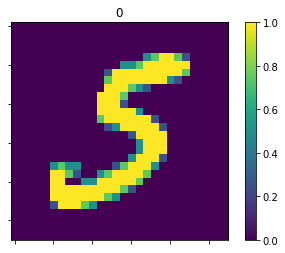

class to explain: 6


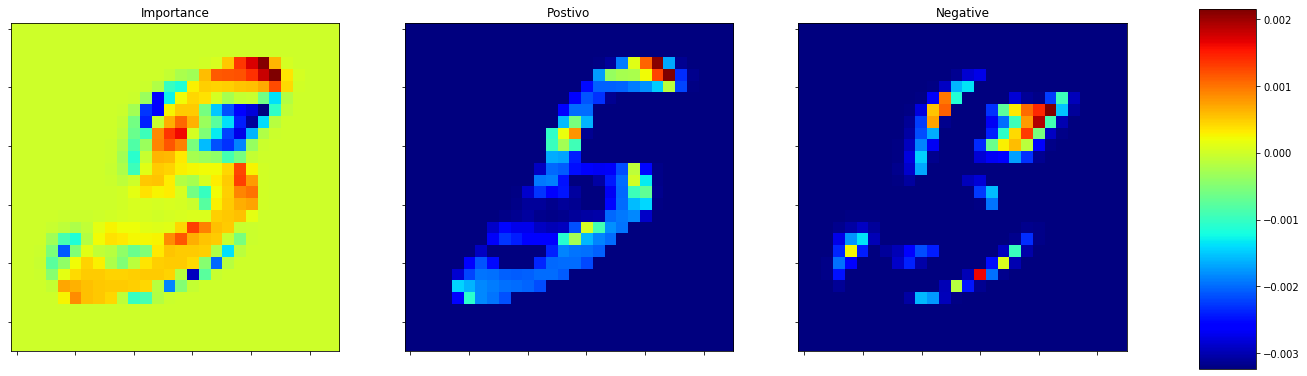

In [73]:
cp = plot_figure(x_explain)
plot_explanation(6)

## Importance for 9

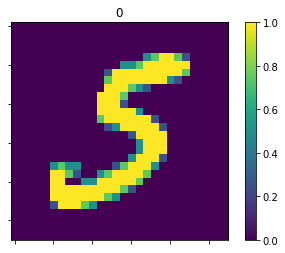

class to explain: 3


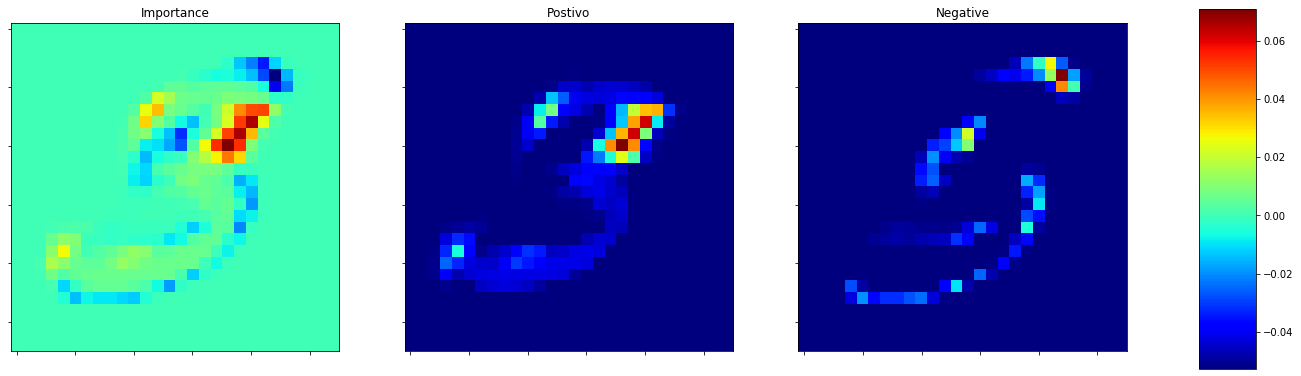

In [74]:
cp = plot_figure(x_explain)
plot_explanation(3)

## Importance for 5

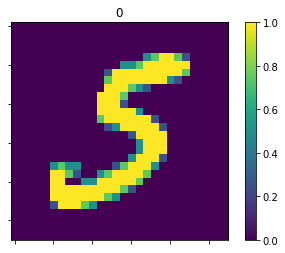

class to explain: 9


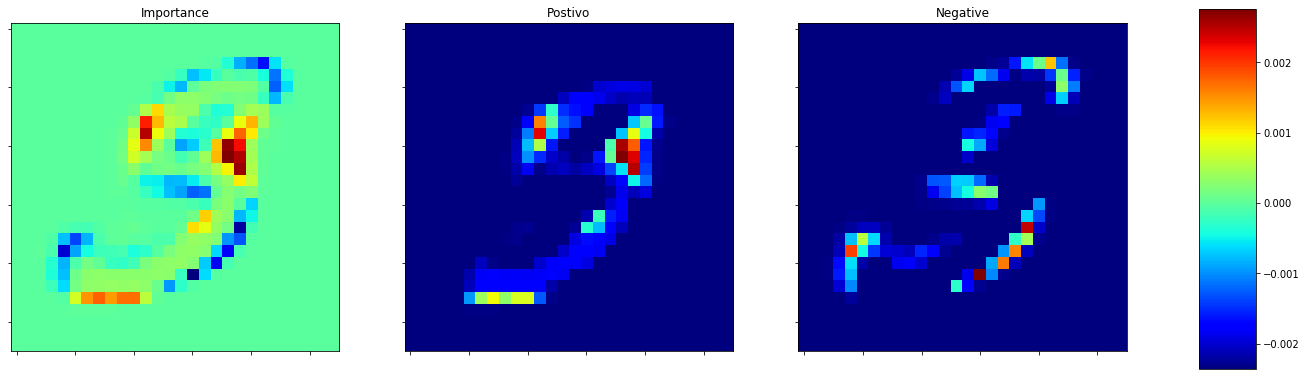

In [75]:
cp = plot_figure(x_explain)
plot_explanation(9)

# Changing linear model

In [77]:
from sklearn.linear_model import SGDRegressor as Linear
# HuberRegressor
model_linear = Linear()

class to explain: 7


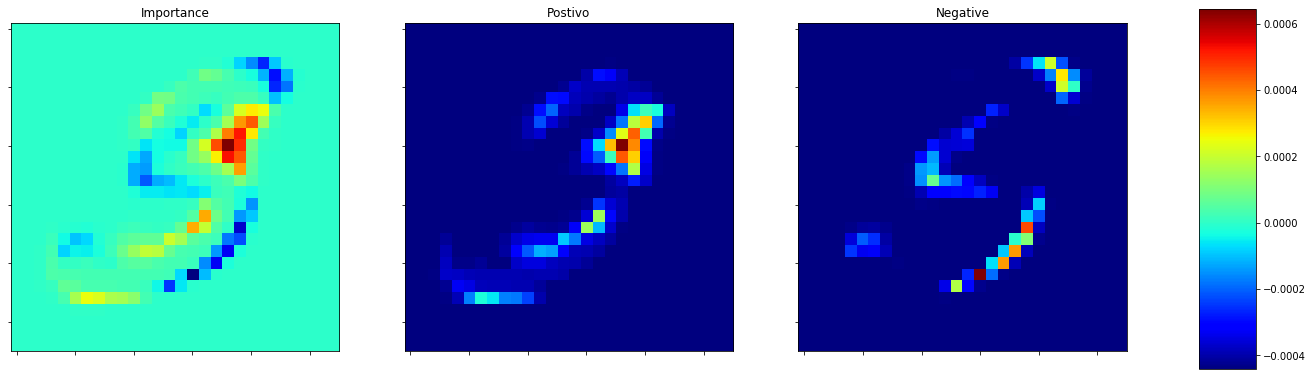

In [79]:
plot_explanation(7, model_linear)

In [ ]:
from sklearn.linear_model import HuberRegressor
model_linear = HuberRegressor()
model_linear.fit(x_sample, y_p)

In [ ]:
x_explain = x_1[0][6].numpy()
plot_figure(x_explain)

In [ ]:
x_sample = density.sample_radius(x_exp=x_explain.reshape(-1, 784), r=4, n_samples=7000, random_state=None)
example_data = torch.from_numpy(x_sample.reshape(-1, 1, 28, 28)).to(density.model.device)
x_explain_tf = torch.from_numpy(x_explain.reshape(-1, 1, 28, 28)).to(density.model.device)
y_explain = model_predict(x_explain_tf)
y_explain_index = y_explain.data.max(1, keepdim=True)[1][0].item()
y_explain_index

In [ ]:
# fig, axis = plt.subplots(10, 10, figsize=(15, 10))
# axis= axis.reshape(-1)
# for ax, img_i in zip(axis, x_sample[30:]):
#     x_ = img_i.reshape(28, 28)
#     plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)
#     ax.imshow(x_, interpolation = 'none')
# plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
# plt.show()

In [ ]:
output = model_predict(example_data)
output_np = output.data.exp().to(density.model.device_cpu).numpy()

In [ ]:
# for i, img_i in enumerate(example_data[:200]):
#     fig, ax = plt.subplots(1, figsize=(10, 10))
#     x_ = img_i.to(density.model.device_cpu).reshape(28, 28)  # .reshape(28, 28)
#     plt.setp(ax.get_xticklabels(), visible=False)
#     plt.setp(ax.get_yticklabels(), visible=False)
#     ax.imshow(x_, interpolation = 'none', cmap='gray')
#     index_sorted = np.argsort(output_np[i])[::-1][:2]
#     porcentagem = output_np[i][index_sorted]*100
#     ax.set_title("Prediction: {} - {:5.2f} ; {} - {:5.2f} ".format(
#         output.data.max(1, keepdim=True)[1][i].item()
#         , porcentagem[0]
#         , index_sorted[1]
#         , porcentagem[1]
        
#     )
                 
#     )
# #     plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99, wspace=0.01, hspace=0.001)
#     plt.savefig('./fig/8/fig{:}.png'.format(i))
#     plt.close()

In [ ]:
# select = [i for i in range(output_np.shape[1]) if i != y_explain_index]
# out_others = np.sum(output_np[:, select], axis=1)
y_p = np.empty((output_np.shape[0], 1))
y_p[:, 0] = output_np[:, y_explain_index]
# y_p[:, 1] = out_others
y_p

In [ ]:
from sklearn.linear_model import HuberRegressor
model_linear = HuberRegressor()
model_linear.fit(x_sample, y_p)

In [ ]:
importance = np.abs(model_linear.coef_.reshape(28, 28))
# importance = (model_linear.coef_.reshape(28, 28))/np.max(importance)

In [ ]:
fig, ax1 = plt.subplots(1,1)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)
cs = ax1.imshow(importance, interpolation = 'none', cmap='jet')
fig.colorbar(cs)